## Unsupervised Analysis of day of the week
Learning about the relationships between days of the week based on bike crossings over the bridge (features)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


## Get Data

In [2]:
from Vis1.data import get_fremont_data
data = get_fremont_data()


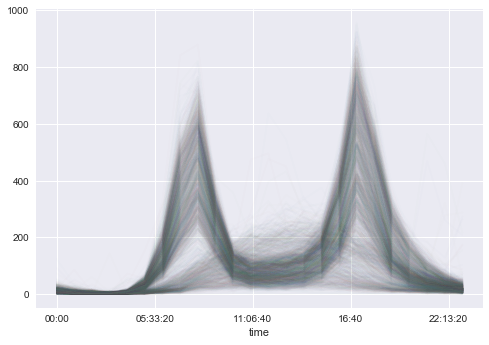

In [3]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## Principal Component Analysis
PCA project of each data point with 24 observations. Results in 2D project of the original data

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2220, 24)

In [5]:
X2 = PCA(2, svd_solver = 'full').fit_transform(X)
X2.shape

(2220, 2)

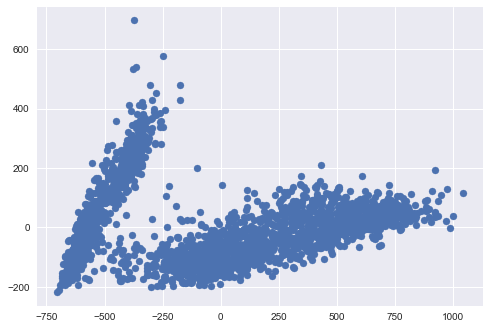

In [6]:
# Dimensionality reduction
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsupervised Clustering

In [7]:
# in the above graph, it looks like we have two types of "Days"
    # Certain days in one cluster, others in another
# Automatically identfy the 2 clusters of days
    # using a Gaussian Mixture Model
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

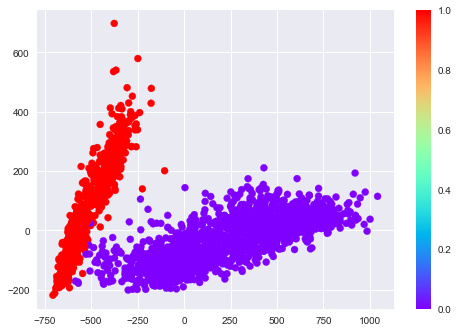

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="rainbow")
plt.colorbar()

Text(0.5,1,'Red Cluster')

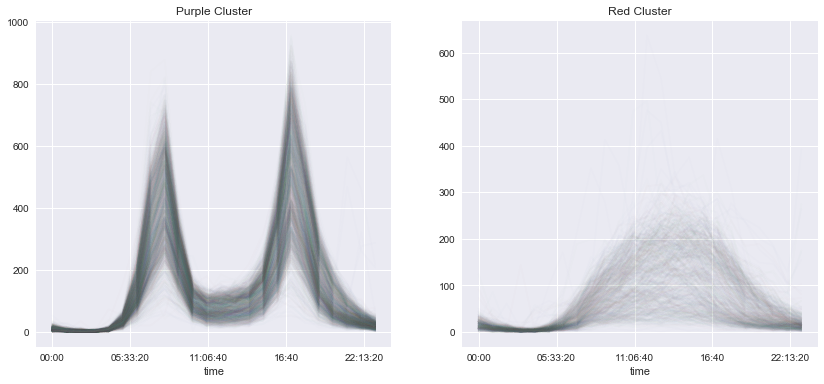

In [9]:
# Examine each cluster
    # Commute days: Week days
fig, ax = plt.subplots(1, 2, figsize = (14,6))
pivoted.T[labels == 0].T.plot(legend=False, alpha = 0.01, ax=ax[0])
# The other cluster: # none commute days, Weekends
pivoted.T[labels == 1].T.plot(legend=False, alpha = 0.01, ax=ax[1])
ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing with day of thet week

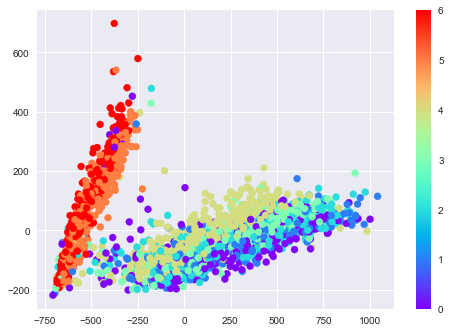

In [10]:
# The columns of the pivoted, show the days 
# Converting them to days of the week 
import pandas as pd
# The day of the week for each date sample
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap="rainbow")
plt.colorbar()

## Analyzing Outliers 
The above graph shows 5 and 6 (Saturday and Sunday) to be in a different cluster than the days of the week. It can be seen in the graph, few week day points, in the weekend cluster (label 1). 

These are non-weekends that look like weekends. These are christmase, labour day, fourth of july, the holidays. 
Holidays of the year based on bikes going across the bridge of Fremont in Seattle were identified identified 

In [11]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek <5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04', '2018-09-03'],
              dtype='datetime64[ns]', freq=None)